# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [121]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
import seaborn as sns

In [8]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [11]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\joelp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


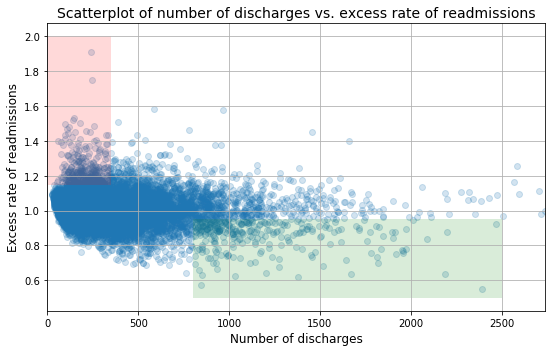

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Analysis Interpritation

## Initial observations based on the plot above

#### 1. Overall, rate of readmissions is trending down with increasing number of discharges
    It's hard to tell baised on the graph as the majority of points seem to be between the x values 0 and 1000 and the y values 0.8 and 1.2 and there aren't many points that are outside those values. If we look at the right end of the graph, x=1,500 and on, there are values in the 0.6 range but there seem to be a lot more aound 1. I would like to see a trendline to help interprit the graph. 
    
#### 2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
    This seems to be the case. I would like to separate the hospitals into different groups (large = >1000 discharges and small = <100 discharges to test them as diffent groups as they have different resources and are most likely in different areas (urban vs. rural) and may face different challenges
 
 
#### 3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)
    This seems missleading as there are a lot of hospitals that have a high discharge rate and a higher that the grean shaded area of readmissions
    
## Statistics:

#### In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

#### In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
    These could be accurate but may need a little more interpritation to really see whats going on here. They have not included a p-value or other statistic to show if this difference is significant
    
## Conclusions:

#### There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
    Again, I am not sure if this is obvious from the graph and without any statitics to help prove this we don't know how accurate this is 
#### Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.
    This could be a totally fair assesment and would be worth looking into. They did not provide any evidence of the validity of this statement

## Regulatory policy recommendations:

#### Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. 
    Small capacity hsopitals are most likely in rural areas and may not be able to upgrade quality care with their resource and they can't really be shut down as there may not be a good alternate for the people of those areas
#### Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
    This is a good idea in a vacume and baised on their results this is a good idea. It may be hard to consoladate into larger hospitals as they would need to be physically expanded and would increase the transportation times for most people which could cause problems with time sensitive hospital needs i.e. heart attacks, bleeding wounds, strokes, etc.

In [70]:
#Were going to split the data into three separate groups <100 and >1000 readmissions

df_small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<=100]
df_large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>=1000]
df_rest = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >100]
df_rest = df_rest[df_rest['Number of Discharges']<1000]

#let's look at the totals for each group and make sure they add up to the original length
print('Large: ',len(df_large))
print('Small: ',len(df_small))
print('Rest: ', len(df_rest))
print('Total: ',len(df_large)+len(df_small)+len(df_rest))
print('Total DF:',len(clean_hospital_read_df))

Large:  464
Small:  1304
Rest:  9810
Total:  11578
Total DF: 11578


In [71]:
#Let's remove any hospitals with 0 discharges
df_small_0 = df_small[df_small['Number of Discharges']==0]
print(len(df_small_0))
print(len(df_small))
df_small = df_small[df_small['Number of Discharges']!=0]
print(len(df_small))

81
1304
1223


0


In [99]:
#Let's run some t-test on our groups
small_mean = df_small['Excess Readmission Ratio'].mean()
small_n =len(df_small)
large_mean = df_large['Excess Readmission Ratio'].mean()
large_n =len(df_large)
rest_mean = df_rest['Excess Readmission Ratio'].mean()
rest_n = len(df_rest)

print('Small Mean:', small_mean,'\nSmall n:',small_n,'\nLarge Mean:',large_mean,'\nLarge n:',large_n,'\nRest Mean:',rest_mean,'\nRest n:',rest_n,)


Small Mean: 1.0220883892068686 
Small n: 1223 
Large Mean: 0.9783342672413797 
Large n: 464 
Rest Mean: 1.007065219164113 
Rest n: 9810


In [96]:
small_v_large = stats.ttest_ind(df_small['Excess Readmission Ratio'], df_large['Excess Readmission Ratio'], equal_var = False)
print('Small vs Large:\n', 'statistic',small_v_large[0],'\n p value',small_v_large[1])

small_v_rest = stats.ttest_ind(df_small['Excess Readmission Ratio'], df_rest['Excess Readmission Ratio'], equal_var = False)
print('Small vs Rest:\n', 'statistic',small_v_rest[0],'\n p value',small_v_rest[1])

large_v_rest = stats.ttest_ind(df_large['Excess Readmission Ratio'], df_rest['Excess Readmission Ratio'], equal_var = False)
print('Large vs Rest:\n', 'statistic',large_v_rest[0],'\n p value',large_v_rest[1])

Small vs Large:
 statistic 7.533013522095164 
 p value 2.0604659724727482e-13
Small vs Rest:
 statistic 7.856216555208372 
 p value 6.253559824841163e-15
Large vs Rest:
 statistic -5.089891805315276 
 p value 5.115595807631601e-07


As we can see wit the p values for all three test there is a significant difference between not only the small and large groups but with the individual groups and the rest of the data points at $\alpha$ = .01.

The groups are statistically different but they might be close enough that it is not a huge practical difference in the groups

In [106]:
#lets look at the difference in means for the groups 

diff_svl = small_mean-large_mean
p_diff_svl = diff_svl / small_mean *100
print(p_diff_svl)

diff_svr = small_mean-rest_mean
p_diff_svr = diff_svr / small_mean *100
print(p_diff_svr)

diff_lvr = large_mean-rest_mean
p_diff_lvr = diff_lvr / large_mean *100
print(p_diff_lvr)

4.280855005058974
1.4698503770709601
-2.9367214136070507


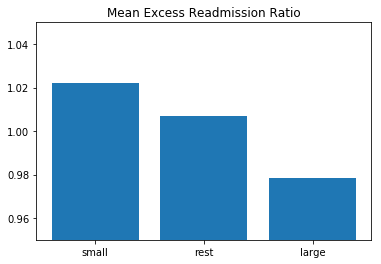

In [119]:
#Bar chart
means=[small_mean,rest_mean,large_mean]
x=['small','rest','large']
plt.bar(x,means)
plt.title('Mean Excess Readmission Ratio')
axes = plt.gca()
axes.set_ylim([.95,1.05])
plt.show()

C:\Users\joelp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


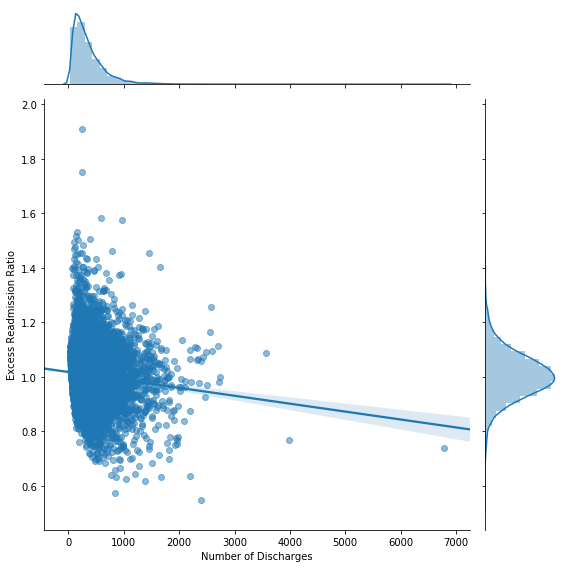

In [124]:
g = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, kind = 'reg', height = 8, scatter_kws = {'alpha' : 0.5})

I like the jointplot to interpret this problem. It has a lot more going on but it tells you more about the data which is good in this case because of the large amount of data points. The top graph shows the x value distribution, the right side shows the y value distribution and it has a trendline that shows the decrease in readmissions as the discharges increases. 

### Conclusions:
    Our analysis show that there is a strong negitive corrilation between the number of discharges that a hospital has and the excess readmission rate. I agree with their conclusion that "Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions" but I do not think the solution is to impliment "hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation" and that "directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges". While the data suggests that these would lead to a decrease in excess readmission rate, this study doesn't look at other factors that lead to why smaller hospitals are showing high excess readmission ratio. 
    Additionaly I don't think the solution is to consolidate hospitals. I would like to further study the affect of distance to hospitals and the sucess rate for the hospital visit. I would like to further explore the potentail affect of decreasing the number of hospitals in a given area would have on the care that is provided. I think this study doesn't explore enough variables to be able to make strong regulatory policy recommendations that may hurt the people they are trying to serve.